# Wednesday, March 12, 2025

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lfsc507/lfsc507.github.io/refs/heads/master/data/SC3seq_Cy_ProcessedData.txt',
                 sep='\t')
df.head()

,macFas5_entrez_id,macFas5_gene_symbol,C6FF_MS11T85,C6FF_MS11T86,C6FF_MS11T87,C6FF_MS11T88,C6FF_MS11T89,C6FF_MS11T91,C6FF_MS11T92,C6FF_MS11T94,...,E09_MS03T84,E09_MS03T86,E09_MS03T87,E09_MS03T90,E09_MS03T94,E13_MS13T65,E14_MS09T18,E16_MS09T29,E16_MS09T31,E17_MS13T91
0,102116043,LOC102116043,5.92983,1.60194,4.205700,3.19590,15.2104,3.54897,0.406812,0.619385,...,0.391435,1.30057,10.11480,8.819130,1.46659,0.748895,1.505210,2.32114,1.61343,1.7363
1,102114891,PGBD2,0.00000,22.42710,0.262856,2.79641,11.0621,4.87984,0.000000,2.477540,...,0.000000,0.00000,0.00000,5.039510,14.66590,0.374448,0.000000,6.18971,0.00000,0.0000
2,102116795,ZNF692,50.40350,34.44160,4.468550,0.00000,0.0000,0.00000,7.729430,0.000000,...,0.391435,6.50284,17.84970,0.419959,0.00000,0.000000,0.000000,51.83880,0.00000,0.0000
3,102117637,ZNF672,0.00000,19.22320,0.000000,83.09350,66.8334,28.83540,38.647100,3.096920,...,28.183300,16.04030,26.17950,2.519750,16.62130,17.973500,25.588600,23.21140,69.37750,92.4579
4,102119506,SH3BP5L,0.00000,4.80581,2.102850,1.19846,29.0380,11.09050,11.390700,53.886500,...,7.828700,15.17330,7.13987,5.879420,19.06560,18.347900,0.752605,0.00000,0.00000,23.4400


In [ ]:
df.shape

(29095, 423)

In [ ]:
# Drop the first column of df
df = df.iloc[:, 1:] # select all rows, and all columns except the first one.

# Set the macFas5_gene_symbol column to be the row names
df.index = df['macFas5_gene_symbol']
# Drop the macFas5_gene_symbol column
df = df.drop('macFas5_gene_symbol', axis=1)

df.head()

,C6FF_MS11T85,C6FF_MS11T86,C6FF_MS11T87,C6FF_MS11T88,C6FF_MS11T89,C6FF_MS11T91,C6FF_MS11T92,C6FF_MS11T94,C6FF_MS11T95,C6oF_MS05T53,...,E09_MS03T84,E09_MS03T86,E09_MS03T87,E09_MS03T90,E09_MS03T94,E13_MS13T65,E14_MS09T18,E16_MS09T29,E16_MS09T31,E17_MS13T91
macFas5_gene_symbol,,,,,,,,,,,,,,,,,,,,,
LOC102116043,5.92983,1.60194,4.205700,3.19590,15.2104,3.54897,0.406812,0.619385,4.75850,18.91270,...,0.391435,1.30057,10.11480,8.819130,1.46659,0.748895,1.505210,2.32114,1.61343,1.7363
PGBD2,0.00000,22.42710,0.262856,2.79641,11.0621,4.87984,0.000000,2.477540,0.00000,5.40363,...,0.000000,0.00000,0.00000,5.039510,14.66590,0.374448,0.000000,6.18971,0.00000,0.0000
ZNF692,50.40350,34.44160,4.468550,0.00000,0.0000,0.00000,7.729430,0.000000,9.04116,46.47120,...,0.391435,6.50284,17.84970,0.419959,0.00000,0.000000,0.000000,51.83880,0.00000,0.0000
ZNF672,0.00000,19.22320,0.000000,83.09350,66.8334,28.83540,38.647100,3.096920,72.32930,14.58980,...,28.183300,16.04030,26.17950,2.519750,16.62130,17.973500,25.588600,23.21140,69.37750,92.4579
SH3BP5L,0.00000,4.80581,2.102850,1.19846,29.0380,11.09050,11.390700,53.886500,0.00000,8.10545,...,7.828700,15.17330,7.13987,5.879420,19.06560,18.347900,0.752605,0.00000,0.00000,23.4400


In [ ]:
# log transform values in df
df = df.apply(lambda x: np.log2(x + 1))
df.head()


,C6FF_MS11T85,C6FF_MS11T86,C6FF_MS11T87,C6FF_MS11T88,C6FF_MS11T89,C6FF_MS11T91,C6FF_MS11T92,C6FF_MS11T94,C6FF_MS11T95,C6oF_MS05T53,...,E09_MS03T84,E09_MS03T86,E09_MS03T87,E09_MS03T90,E09_MS03T94,E13_MS13T65,E14_MS09T18,E16_MS09T29,E16_MS09T31,E17_MS13T91
macFas5_gene_symbol,,,,,,,,,,,,,,,,,,,,,
LOC102116043,2.792820,1.379588,2.380092,2.068980,4.018848,2.185540,0.492430,0.695446,2.525693,4.315617,...,0.476574,1.201991,3.474410,3.295595,1.302518,0.806444,1.324932,1.731679,1.385945,1.452226
PGBD2,0.000000,4.550106,0.336690,1.924636,3.592409,2.555777,0.000000,1.798067,0.000000,2.678890,...,0.000000,0.000000,0.000000,2.594432,3.969556,0.458852,0.000000,2.845934,0.000000,0.000000
ZNF692,5.683795,5.147372,2.451158,0.000000,0.000000,0.000000,3.125887,0.000000,3.327854,5.568981,...,0.476574,2.907437,4.236470,0.505849,0.000000,0.000000,0.000000,5.723526,0.000000,0.000000
ZNF672,0.000000,4.337939,0.000000,6.393922,6.083924,4.898953,5.309143,2.034540,6.196318,3.962531,...,4.867071,4.090879,4.764447,1.815473,4.139248,4.245914,4.732736,4.597615,6.137042,6.546245
SH3BP5L,0.000000,2.537497,1.633594,1.136493,4.908717,3.595802,3.631186,5.778379,0.000000,3.186730,...,3.142201,4.015542,3.025006,2.782287,4.326652,4.274105,0.809501,0.000000,0.000000,4.611172


In [ ]:
# Genes and colors from Fig 3
lin_genes = ("GAPDH", "POU5F1", "NANOG", "SOX2", "PRDM14", "DPPA3",
  "GATA6",   "PDGFRA", "GATA4", "TFAP2C", "GATA3", "CDX2",
  "T", "MIXL1")
days = ["E06", "E07", "E08", "E09", "E13", "E14", "E16", "E17"]
day_colors = ["lightblue", "blue", "black", "purple", "yellow", "orange", "red", "brown"]


In [ ]:
df.shape

(29095, 421)

In [ ]:
# Filter cells based on their names
dfe = df.loc[:, df.columns.str.startswith('E')]
dfe.head()

,E13_MS10T45,E13_MS10T46,E13_MS10T48,E13_MS10T49,E13_MS13T66,E13_MS13T67,E13_MS13T68,E13_MS13T69,E13_MS13T70,E13_MS13T71,...,E09_MS03T84,E09_MS03T86,E09_MS03T87,E09_MS03T90,E09_MS03T94,E13_MS13T65,E14_MS09T18,E16_MS09T29,E16_MS09T31,E17_MS13T91
macFas5_gene_symbol,,,,,,,,,,,,,,,,,,,,,
LOC102116043,3.512075,2.984496,2.398077,0.000000,1.984928,2.178214,2.684664,1.698663,1.817288,1.103833,...,0.476574,1.201991,3.474410,3.295595,1.302518,0.806444,1.324932,1.731679,1.385945,1.452226
PGBD2,0.000000,2.156154,0.000000,0.000000,0.000000,4.885574,0.000000,0.401474,4.013024,3.177081,...,0.000000,0.000000,0.000000,2.594432,3.969556,0.458852,0.000000,2.845934,0.000000,0.000000
ZNF692,3.688829,4.925363,3.631023,1.621037,1.793005,0.000000,4.111691,0.000000,2.333049,4.716085,...,0.476574,2.907437,4.236470,0.505849,0.000000,0.000000,0.000000,5.723526,0.000000,0.000000
ZNF672,5.137516,5.626483,4.285972,3.957144,5.406608,4.642488,0.000000,6.135557,3.260358,5.324613,...,4.867071,4.090879,4.764447,1.815473,4.139248,4.245914,4.732736,4.597615,6.137042,6.546245
SH3BP5L,0.000000,2.984496,1.277193,2.853573,3.152047,0.000000,0.681006,0.715203,3.404888,2.153076,...,3.142201,4.015542,3.025006,2.782287,4.326652,4.274105,0.809501,0.000000,0.000000,4.611172


In [ ]:
# Filter genes based on their expression:
# log2(RPM+1) > 4 in at least one cell
df_expr = dfe.loc[(dfe > 4).sum(axis=1) >= 1, :]
print(df_expr.shape)
df_expr.head()

(18457, 390)


,E13_MS10T45,E13_MS10T46,E13_MS10T48,E13_MS10T49,E13_MS13T66,E13_MS13T67,E13_MS13T68,E13_MS13T69,E13_MS13T70,E13_MS13T71,...,E09_MS03T84,E09_MS03T86,E09_MS03T87,E09_MS03T90,E09_MS03T94,E13_MS13T65,E14_MS09T18,E16_MS09T29,E16_MS09T31,E17_MS13T91
macFas5_gene_symbol,,,,,,,,,,,,,,,,,,,,,
LOC102116043,3.512075,2.984496,2.398077,0.000000,1.984928,2.178214,2.684664,1.698663,1.817288,1.103833,...,0.476574,1.201991,3.474410,3.295595,1.302518,0.806444,1.324932,1.731679,1.385945,1.452226
PGBD2,0.000000,2.156154,0.000000,0.000000,0.000000,4.885574,0.000000,0.401474,4.013024,3.177081,...,0.000000,0.000000,0.000000,2.594432,3.969556,0.458852,0.000000,2.845934,0.000000,0.000000
ZNF692,3.688829,4.925363,3.631023,1.621037,1.793005,0.000000,4.111691,0.000000,2.333049,4.716085,...,0.476574,2.907437,4.236470,0.505849,0.000000,0.000000,0.000000,5.723526,0.000000,0.000000
ZNF672,5.137516,5.626483,4.285972,3.957144,5.406608,4.642488,0.000000,6.135557,3.260358,5.324613,...,4.867071,4.090879,4.764447,1.815473,4.139248,4.245914,4.732736,4.597615,6.137042,6.546245
SH3BP5L,0.000000,2.984496,1.277193,2.853573,3.152047,0.000000,0.681006,0.715203,3.404888,2.153076,...,3.142201,4.015542,3.025006,2.782287,4.326652,4.274105,0.809501,0.000000,0.000000,4.611172


In [ ]:
# Perform hierarchical clustering
#links = linkage(df_expr.loc[lin_genes[1:], :].T,  method='ward')
links = linkage(df_expr.T,  method='ward')

In [ ]:
# Prepare colors for cells. To be included for annotation.
print(days)
print(day_colors)
cell_colors = df_expr.columns.str.extract(r'(E\d+)')[0].map(dict(zip(days, day_colors)))
cell_colors.index = df_expr.columns
cell_colors.name = 'Time'

['E06', 'E07', 'E08', 'E09', 'E13', 'E14', 'E16', 'E17']
['lightblue', 'blue', 'black', 'purple', 'yellow', 'orange', 'red', 'brown']


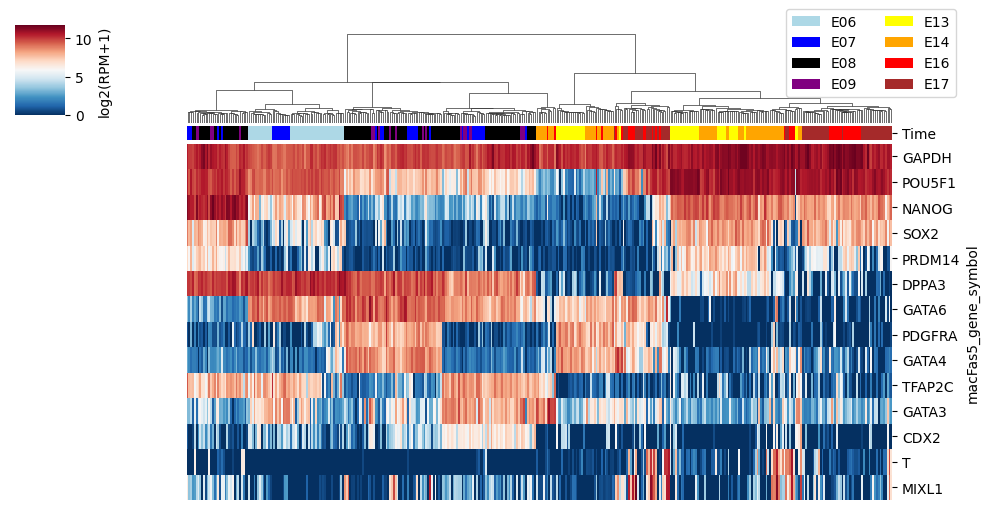

In [ ]:
# Visualize dendrogram from clustering and heatmap for selected lineage genes

g = sns.clustermap(df_expr.loc[lin_genes, :], col_linkage=links, col_colors=cell_colors,
            col_cluster=True, row_cluster=False, cmap='RdBu_r',
               xticklabels=False, figsize=(10, 5), cbar_kws={'label': 'log2(RPM+1)'})

#  Add legend for time points
for day, color in zip(days, day_colors):
    g.ax_col_dendrogram.bar(0, 0, color=color, label=day)
g.ax_col_dendrogram.legend(ncol=2, bbox_to_anchor=(1.1, 1.3))

In [ ]:
# Load the annotated cell lineages
df_lin = pd.read_csv('https://raw.githubusercontent.com/lfsc507/lfsc507.github.io/refs/heads/master/data/Cy_lineages.txt',
                     sep='\t')

In [ ]:
print(df_lin.shape)
df_lin.head()

(390, 6)


,Cell,Cluster,Lineage1,Lineage2,Stage,Color
0,E13_MS10T45,1,EXMC,EX,E13,cyan
1,E13_MS10T46,1,EXMC,EX,E13,cyan
2,E13_MS10T48,1,EXMC,EX,E13,cyan
3,E13_MS10T49,1,EXMC,EX,E13,cyan
4,E13_MS13T66,1,EXMC,EX,E13,cyan


In [ ]:
# Prepare standardized data for the 13 lineage TFs
df2heatmap = df_expr.loc[lin_genes[1:], :]
#df2heatmap -= df2heatmap.mean()
#df2heatmap /= df2heatmap.std()
sc = StandardScaler()
df2heatmap = sc.fit_transform(df2heatmap)
df2heatmap.std(axis=0)
df2heatmap = pd.DataFrame(df2heatmap, columns=df_expr.columns, index=lin_genes[1:])
df2heatmap.head()

,E13_MS10T45,E13_MS10T46,E13_MS10T48,E13_MS10T49,E13_MS13T66,E13_MS13T67,E13_MS13T68,E13_MS13T69,E13_MS13T70,E13_MS13T71,...,E09_MS03T84,E09_MS03T86,E09_MS03T87,E09_MS03T90,E09_MS03T94,E13_MS13T65,E14_MS09T18,E16_MS09T29,E16_MS09T31,E17_MS13T91
POU5F1,-0.120682,0.725318,0.030325,0.328421,0.017055,-0.534424,-0.575537,-0.453739,-0.323895,-0.413308,...,1.176105,0.961900,-0.088332,0.588589,0.405962,-0.685336,-0.314665,-0.235349,-0.565964,0.809139
NANOG,-0.934828,-1.058442,-1.026878,-0.496947,-0.490457,-0.534424,-0.575537,-0.516975,-0.715373,-0.786040,...,0.065056,-0.320687,-0.875688,-0.488718,-0.474647,-1.016432,-0.719702,-0.837322,-1.004226,-0.597134
SOX2,-0.934828,-0.321810,-0.636058,-1.028492,-0.613836,-0.701854,-0.949901,-0.589801,-0.541862,-0.297884,...,-1.115434,-1.130619,-1.467909,-1.142713,-1.145576,-0.685336,-1.151643,-1.220740,-1.121306,-1.011292
PRDM14,-0.273121,-1.058442,-1.026878,-0.496947,-0.787141,-0.813916,-0.726612,-0.780243,-0.715373,-0.786040,...,-1.115434,-1.130619,-0.669494,-1.142713,-1.145576,-1.016432,-1.151643,-0.837322,-1.289316,-0.862959
DPPA3,-0.273121,0.459304,-0.187519,-0.092793,-0.787141,0.144818,0.327133,-0.675657,-0.715373,-0.413308,...,1.177327,1.233891,1.216483,0.970562,0.725519,1.344692,0.945287,0.916672,1.412127,1.642414


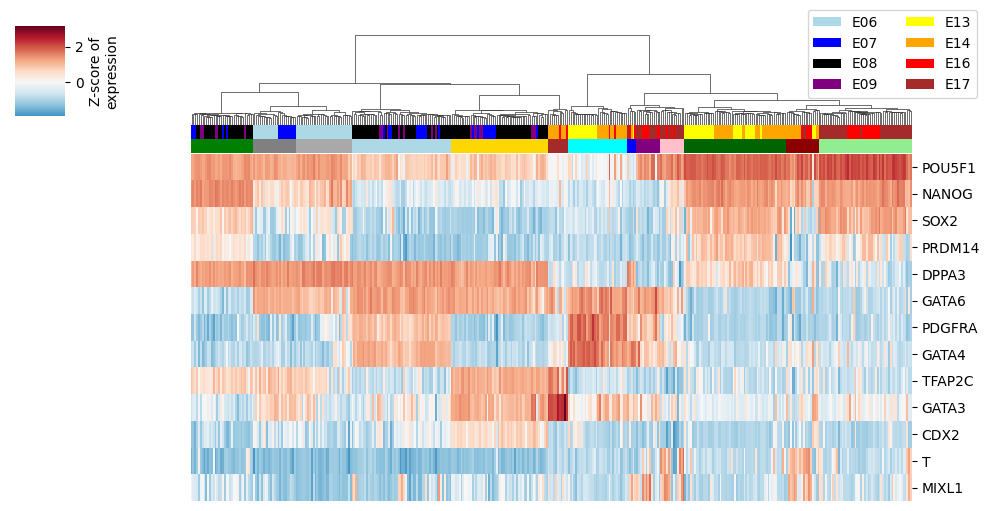

In [ ]:
# Visualize dendrogram from clustering and heatmap for selected lineage genes

g = sns.clustermap(df2heatmap, col_linkage=links, col_colors=[cell_colors, df_lin.Color],
            col_cluster=True, row_cluster=False, cmap='RdBu_r', center=0,
               xticklabels=False, figsize=(10, 5), cbar_kws={'label': 'Z-score of\nexpression'})

#  Add legend for time points
for day, color in zip(days, day_colors):
    g.ax_col_dendrogram.bar(0, 0, color=color, label=day)
g.ax_col_dendrogram.legend(ncol=2, bbox_to_anchor=(1.1, 1.3))


In [ ]:
pca = PCA(n_components=10)
df_expr_pca = pca.fit_transform(df_expr.T)

In [ ]:
df_expr_pca.shape

(390, 10)

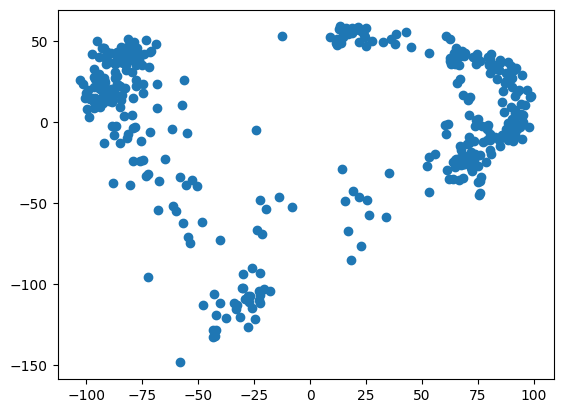

In [ ]:
# PCA plot. X-coordinates: those for PC1. Y-coordinates: PC2
plt.scatter(df_expr_pca[:,0], df_expr_pca[:,1])

In [ ]:
# Loading of genes
pca.components_.shape

(10, 18457)

<BarContainer object of 10 artists>

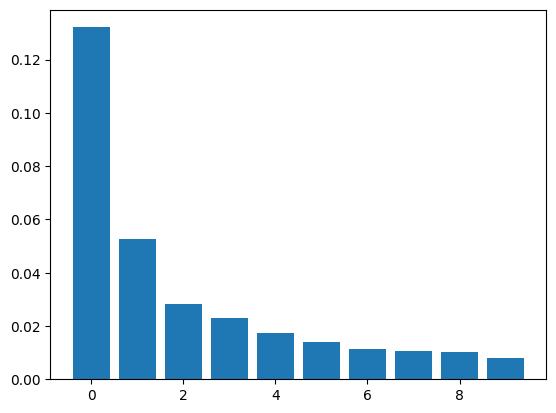

In [ ]:
# Variance explained
plt.bar(range(10), pca.explained_variance_ratio_)

In [ ]:
# Filter cells
df_epi = df_expr.loc[:,  df_lin.loc[df_lin.Lineage2.isin(['EPI', 'ICM'])].Cell.values]
# Filter genes
df_epi = df_epi.loc[(df_epi>4).sum(axis=1) > 0, :]

df_epi.shape

(17294, 213)

In [ ]:
pca_epi = PCA(n_components=10)
df_epi_pca = pca_epi.fit_transform(df_epi.T)

In [ ]:
df_epi_pca.shape

(213, 10)

Text(0, 0.5, 'PC1')

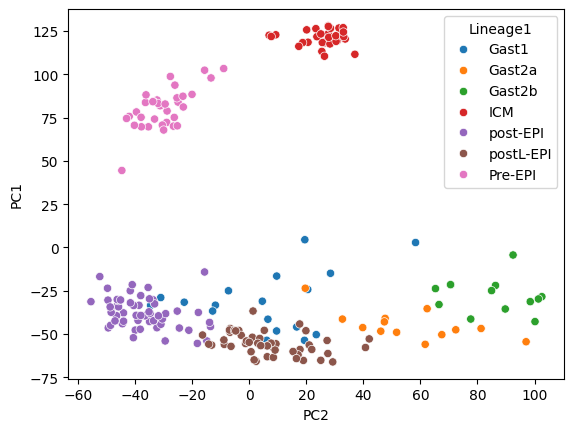

In [ ]:
df_lin_epi = df_lin.loc[df_lin.Lineage2.isin(['EPI', 'ICM'])]

#plt.scatter(df_epi_pca[:,0], df_epi_pca[:,1], c=df_lin_epi.Lineage1)
sns.scatterplot(x=df_epi_pca[:,1], y=df_epi_pca[:,0], hue=df_lin_epi.Lineage1)
plt.xlabel('PC2')
plt.ylabel('PC1')

In [ ]:
pca_epi.components_.shape

(10, 17294)

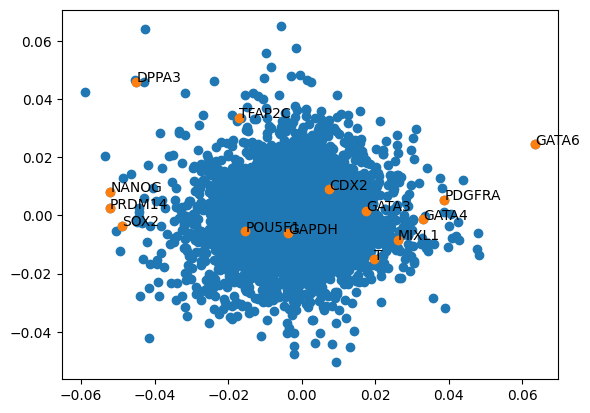

In [ ]:
plt.scatter(pca_epi.components_[1,:], pca_epi.components_[0,:])
plt.scatter(pca_epi.components_[1, df_epi.index.isin(lin_genes)], pca_epi.components_[0, df_epi.index.isin(lin_genes)])
for gene in lin_genes:
  pc2_loading = pca_epi.components_[1, df_epi.index.get_loc(gene)]
  pc1_loading = pca_epi.components_[0, df_epi.index.get_loc(gene)]
  plt.annotate(gene, (pc2_loading, pc1_loading))